<a href="https://colab.research.google.com/github/Renato-Eishima/Python_analise_financas/blob/main/Markowitz_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Obtendo a Fronteira Eficiente de Markowitz - parte 2

Ok, vamos continuar o exercício a partir da última aula.

Os downloads dos dados e os pesos aleatórios já foram feitos na última aula.

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 15.2 MB/s 
     |████████████████████████████████| 63 kB 779 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [16]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

acoes = ['EGIE3.SA', 'ITSA4.SA', 'SULA11.SA', 'ABEV3.SA', 'LREN3.SA', 'SLCE3.SA', 'BBAS3.SA', 'CSAN3.SA', 'B3SA3.SA'] 
carteira = pd.DataFrame()

for acao in acoes:
  carteira[acao] = yf.download(acao, start = '2017-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
ret_log = np.log(carteira / carteira.shift(1))
num_ativo = len(acoes)

pesos = np.random.random(num_ativo)
pesos /= np.sum(pesos)              # é o mesmo que pesos = pesos / sum(pesos)
pesos                               # a linha acima serve para criar nove pesos cuja soma é igual a 1 

array([0.1563504 , 0.18678711, 0.10670791, 0.11340463, 0.03032442,
       0.07106543, 0.13616154, 0.07689191, 0.12230666])

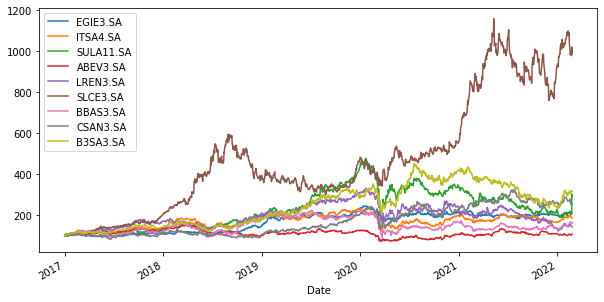

In [18]:
(carteira / carteira.iloc[0] * 100).plot(figsize = (10, 5))

Agora, estimando o retorno esperado da carteira, a Variância e a Volatilidade.

Retorno Esperado da Carteira:

In [19]:
ret_carteira = np.sum(pesos * ret_log.mean()) * 250 # ret_carteira - expectativa do retorno da carteira
ret_carteira

0.15967593858297713

Variância Esperada da Carteira:

In [20]:
var_carteira = np.dot(pesos.T, np.dot(ret_log.cov() * 250, pesos))
var_carteira

0.06384294104896315

Volatilidade Esperada da Carteira:

In [21]:
vol_carteira = np.sqrt(np.dot(pesos.T, np.dot(ret_log.cov() * 250, pesos)))
vol_carteira

0.25267160712862685

O resto desse exercício será uma reprodução do que foi feito em aula.

1)	Crie duas listas vazias. Nomeie-os como retorno_carteira e volatilidade_carteira.

In [22]:
retorno_carteira = []
volatilidade_carteira = []

2)  Crie um loop de 1000 iterações que gerará os pesos aleatórios e inserindo os valores obtidos do retorno da carteira e o volatidade da carteira nas listas retorno_carteira e volatilidade_carteira, respectivamente.

In [23]:
for x in range(1000):
  pesos = np.random.random(num_ativo)
  pesos /= np.sum(pesos)
  ret_carteira = np.sum(pesos * ret_log.mean()) * 250
  vol_carteira = np.sqrt(np.dot(pesos.T, np.dot(ret_log.cov() * 250, pesos)))
  retorno_carteira.append(ret_carteira)
  volatilidade_carteira.append(vol_carteira)

retorno_carteira, volatilidade_carteira

([0.1567045771893554,
  0.18694552583172117,
  0.18933180476186243,
  0.19161286797803537,
  0.15557439495960168,
  0.1873103974242547,
  0.1985881332691733,
  0.19667858470089708,
  0.187691056291936,
  0.17959278907975051,
  0.15382295264732487,
  0.1459859197348248,
  0.16266540676989527,
  0.18271719652047627,
  0.15859605636246296,
  0.17017544568781745,
  0.1479059095632918,
  0.1477001935118307,
  0.17732723133350609,
  0.23517557516995688,
  0.19295279015503763,
  0.14817888302101673,
  0.14080627612490776,
  0.15070050665973778,
  0.17620136396721978,
  0.13829260330958346,
  0.17795936930059328,
  0.16809154886039893,
  0.1212926953878765,
  0.1362105309688173,
  0.1821626815331975,
  0.16578411684359895,
  0.17256251977980888,
  0.16769631236615468,
  0.14958374298692165,
  0.15988901248618098,
  0.18905869749147303,
  0.19080435802817824,
  0.1696174534333733,
  0.1474537268702755,
  0.2401419292849967,
  0.20206932599583924,
  0.15857351802624642,
  0.20360425530318313,
  

3)	Transforme as listas obtidas em NumPy array e insira dentro retorno_carteira e volatilidade_carteira. Uma vez tendo feito isso, os dois objetos serão do tipo NumPy array. 

In [24]:
retorno_carteira = np.array(retorno_carteira)
volatilidade_carteira = np.array(volatilidade_carteira)

retorno_carteira, volatilidade_carteira
# Veja que agora os dois não são mais listas, mas do tipo NumPy Array.

(array([0.15670458, 0.18694553, 0.1893318 , 0.19161287, 0.15557439,
        0.1873104 , 0.19858813, 0.19667858, 0.18769106, 0.17959279,
        0.15382295, 0.14598592, 0.16266541, 0.1827172 , 0.15859606,
        0.17017545, 0.14790591, 0.14770019, 0.17732723, 0.23517558,
        0.19295279, 0.14817888, 0.14080628, 0.15070051, 0.17620136,
        0.1382926 , 0.17795937, 0.16809155, 0.1212927 , 0.13621053,
        0.18216268, 0.16578412, 0.17256252, 0.16769631, 0.14958374,
        0.15988901, 0.1890587 , 0.19080436, 0.16961745, 0.14745373,
        0.24014193, 0.20206933, 0.15857352, 0.20360426, 0.17289499,
        0.17524572, 0.15617495, 0.16149215, 0.16915971, 0.11996009,
        0.14279887, 0.16098526, 0.18410786, 0.1742153 , 0.18600105,
        0.1736961 , 0.16235436, 0.13205302, 0.21156736, 0.1850154 ,
        0.17645173, 0.208194  , 0.18523117, 0.14136074, 0.17041422,
        0.20781483, 0.19762896, 0.14290978, 0.18045665, 0.18482856,
        0.12984052, 0.15653006, 0.19167177, 0.14